#Pandas Express 
###An express guide to becoming a Kung Fu Pandas master

<img src="http://vignette1.wikia.nocookie.net/kungfupanda/images/8/88/Po2.jpg/revision/latest?cb=20100726062228" width="300"/>

After defeating the evil snow leopard Tai Lung, our favorite kung fu panda master Po returns to the Valley of Peace to help his father Mr. Ping with his noodle restaurant. Mr. Ping's noodle restaurant hasn't been doing so well, so Po is determined to help his dad figure out what he can do to improve his restaurant. Luckily, Po has been trained in the Python style of Shaolin martial arts and will analyze a dataset from Yelp to save his father's restaurant, like a true Kung Fu Pandas master.

###The Tools
This tutorial will walk you through doing some basic data cleaning and exploratory analysis with Pandas and a suite of other Python data analysis tools. Below are a few of the tools we will be using:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), for making plots pretty
* [statsmodels](http://statsmodels.sourceforge.net/), for statistical analysis
* [sklearn](http://scikit-learn.org), for machine learning

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn 

# iPython command to format matplotlib plots
%matplotlib inline 

If you have trouble importing any of the packages, you might need to install it first from the website or, if you're on Mac OS or ubuntu, from the console with: `pip install <name of package>`

###The Dataset
We will be using a dataset of Yelp reviews provided by the [Yelp Dataset Challenge](http://www.yelp.com/dataset_challenge). The download consists of the following files in JSON format:
* business.json - information on businesses
* review.json - text and metadata of reviews
* tip.json - text and metadata of tips
* user.json - information on users
* checkin.json - number of checkins at each business

In this tutorial, we will be primarily focused on the business.json file

###Loading in and cleaning the data
The Yelp dataset is in JSON format, [which you can read about here](https://en.wikipedia.org/wiki/JSON) if you are at all interested. Luckily, Python (and most other programming languages) have packages for parsing and reading JSON file formats. In this case, we are going to use Python's JSON file reader to read in the file and then convert it to a Pandas DataFrame. 

(Note: Pandas also has a [`read_json`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) function that reads in a JSON file into a DataFrame directly, but in this case, we had to do a little cleanup to remove trailing whitespace at the end of each line, so we didn't use that particular function)

####Load in data

In [2]:
import json

'''
load_data(filepath) 
Given a filepath to a JSON file, loads in the file and formats the JSON
'''
def load_data(filepath):
    data = []
    
    # Open file and read in line by line
    with open(filepath) as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))

    return data

In [3]:
data = load_data('data/business.json')

In [43]:
business_df = pd.DataFrame.from_dict(data)

####Now let's take a peek inside
The [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe) has a full list of functions, but below are some helpful ones for doing some initial poking around. 

In [5]:
'''
head(n=5)
Returns first n rows
'''
business_df.head(5)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


In [6]:
'''
info(verbose=None, buf=None, max_cols=None, memory_usage=None, null_counts=None)
Concise summary of a DataFrame.
'''
business_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 61183
Data columns (total 15 columns):
attributes       61184 non-null object
business_id      61184 non-null object
categories       61184 non-null object
city             61184 non-null object
full_address     61184 non-null object
hours            61184 non-null object
latitude         61184 non-null float64
longitude        61184 non-null float64
name             61184 non-null object
neighborhoods    61184 non-null object
open             61184 non-null bool
review_count     61184 non-null int64
stars            61184 non-null float64
state            61184 non-null object
type             61184 non-null object
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 7.1+ MB


In [7]:
'''
describe(percentile_width=None, percentiles=None, include=None, exclude=None)
Generate various summary statistics, excluding NaN values.
'''
business_df.describe()

,latitude,longitude,open,review_count,stars
count,61184.000000,61184.000000,61184,61184.000000,61184.000000
mean,37.326077,-97.491803,0.878089,28.272506,3.673305
std,5.741085,29.624473,0.3271856,88.652050,0.891207
min,32.871923,-115.386550,False,3.000000,1.000000
25%,33.509601,-115.052224,1,4.000000,3.000000
50%,35.994636,-111.932944,1,8.000000,3.500000
75%,36.240430,-80.863329,1,21.000000,4.500000
max,56.036545,8.549249,True,4578.000000,5.000000


In [8]:
'''
shape
Attribute of a DataFrame as (rows, columns)
'''
business_df.shape

(61184, 15)

Some of the most commonly used operations on Dataframes are various types of indexing, filtering, and slicing. Pandas has a number of different ways to do these operations ([check out this whole page of documentation about it](http://pandas.pydata.org/pandas-docs/stable/indexing.html)), but below are a few examples.

In [9]:
# Select a column (returns a Series)
business_df['name'].head()

0           Eric Goldberg, MD
1                Clancy's Pub
2    Cool Springs Golf Center
3            Verizon Wireless
4               Emil's Lounge
Name: name, dtype: object

In [10]:
# Select multiple columns (returns a DataFrame)
business_df[['business_id', 'name']].head()

,business_id,name
0,vcNAWiLM4dR7D2nwwJ7nCA,"Eric Goldberg, MD"
1,UsFtqoBl7naz8AVUBZMjQQ,Clancy's Pub
2,cE27W9VPgO88Qxe4ol6y_g,Cool Springs Golf Center
3,HZdLhv6COCleJMo7nPl-RA,Verizon Wireless
4,mVHrayjG3uZ_RLHkLj-AMg,Emil's Lounge


In [11]:
# Filter a column on a value
business_df[business_df['name'] == 'Panda Express'].head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
1816,"{u'Take-out': True, u'Accepts Credit Cards': T...",kMcbuXZx3iILJVEPyLgPpQ,"[Chinese, Restaurants]",Champaign,"2000 N Neil St\nChampaign, IL 61820",{},40.139918,-88.244639,Panda Express,[],True,5,3.5,IL,business
2613,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",nLpV9fo8xml-QHOKyOje2A,"[Chinese, Restaurants]",Phoenix,"3923 E Thomas Rd\nPhoenix, AZ 85018",{},33.479870,-111.997824,Panda Express,[],True,13,2.5,AZ,business
2778,"{u'Take-out': True, u'Accepts Credit Cards': T...",wLZ--5d4lXImxrG7VhdTyA,"[Chinese, Restaurants]",Phoenix,"7000 N 16th St\nSte 100\nPhoenix, AZ 85020",{},33.538927,-112.048079,Panda Express,[],True,11,3.5,AZ,business
2994,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",VTFx4ADDP6nPnlcMHB1-Ow,"[Chinese, Restaurants]",Phoenix,"903 E Bell Rd\nSte 101\nPhoenix, AZ 85022",{},33.640255,-112.061145,Panda Express,[],True,7,4.0,AZ,business
3053,"{u'Take-out': True, u'Price Range': 1, u'Outdo...",bexPpkHMthuCaeC0g0Lrfg,"[Chinese, Restaurants]",Phoenix,"10637 N Tatum Blvd\nPhoenix, AZ 85028","{u'Monday': {u'close': u'21:00', u'open': u'10...",33.584266,-111.976787,Panda Express,[],True,7,3.0,AZ,business


###Cleaning and formatting columns

Taking a closer look at the some of the columns, we see that they're not all very user-friendly, so we need to do a little bit of additional cleanup. 

####Format attributes column
Taking a closer look at the `attributes` column, we see that all the attributes for a business are still stored in mulitple levels of nested JSON (which is really annoying to deal with in a DataFrame because you can't sort and do various operations with it). Luckily, the `pandas.io.json` library came equipped with a nifty little function called [`json_normalize`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html) which takes a JSON object, "flattens" any nested objects, and returns a Pandas DataFrame. So we will use this function to create a `attributes_df` DataFrame to store the attributes of a business.

In [44]:
# Collect the business_id and attributes columns and format as a list of dict objects
collect = [{'business_id': x[0], 'attributes': x[1]} for x in business_df[['business_id', 'attributes']].values]

In [45]:
# Create a DataFrame with json_normalize
attributes_df = pd.io.json.json_normalize(collect)

Because Pandas attempted to infer the datatypes of our attributes when it loaded in the data with `json_normalize`, most of the columns came in as object types, so one thing we can do is try to convert the columns to numeric values whenever possible using the `convert_objects` function.

In [46]:
# Convert objects to a numeric datatype if possible
attributes_df = attributes_df.convert_objects(convert_numeric=True)

Now, let's take a look at the attributes that are still non-numeric

In [47]:
non_numeric_attributes = attributes_df.drop('business_id', axis=1).select_dtypes(include=['object']).columns

In [48]:
attributes_df[non_numeric_attributes].head()

,attributes.Ages Allowed,attributes.Alcohol,attributes.Attire,attributes.BYOB/Corkage,attributes.Noise Level,attributes.Smoking,attributes.Wi-Fi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,full_bar,casual,NaN,average,no,no


The easiest way to get categorical text data into a more consummable format is to create dummy/indicator variables for them. To do this, can use a handy-dandy Pandas function [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to help create dummy variables. 

In [49]:
# Create dummy variables for non-numeric attributes
dummy_vars = pd.get_dummies(attributes_df[non_numeric_attributes])

# Drop non-numeric attributes from attributes_df
attributes_df = attributes_df.drop(non_numeric_attributes, axis=1)

# Add the dummy variables to attributes_df
attributes_df = pd.merge(attributes_df, dummy_vars, left_index=True, right_index=True)

If we were to get more picky, there's probably more work we can do with cleaning the attributes, but it's in a good spot now for us to save it and merge it back with our original `business_df`

In [50]:
# Save the list of attributes for future use
attributes = attributes_df.drop('business_id', axis=1).columns.values

In [51]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, attributes_df.drop('business_id', axis=1), left_index = True, right_index = True)

In [52]:
# Drop our original attributes column that is no longer needed
business_df = business_df.drop('attributes', axis=1)

####Create dummy/indicator variables for categories column

Next up, if we now look at the `categories` column, we see that the categories are stored as lists. While that's easy to read, it's not actually in the most usable format if we're going to conduct any data analysis (for example, if we wanted to know how many Chinese restaurants we had in our dataset). We want to create dummy variables for the categories similar to what we did for attributes, but the categories pose an intersting dilemma because they are stored as lists. So we are going to use a slightly modified version of [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) by splitting the lists up using a spring operator and then creating the dummy variables from a string.

In [62]:
# Create dummy variables for categories
categories_df = business_df['categories'].str.join(sep=',').str.get_dummies(sep=',')

In [63]:
# Save the list of categories for future use
categories = categories_df.columns.values

In [69]:
# Merge it with our original dataframe
business_df = pd.merge(business_df, categories_df, left_index = True, right_index = True)

Instead of dropping the `categories` column, we're going to keep it around, but reformat it as a tuple

In [120]:
business_df['categories'] = business_df['categories'].apply(lambda x: tuple(x))

Now we can do things like, say, filter `business_df` for all Chinese restaurants, or do a count of the number of Chinese restaurants

In [121]:
business_df[business_df['Chinese'] == 1].head()

,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,...,Windows Installation,Windshield Installation & Repair,Wine Bars,Wine Tours,Wineries,Wok,Women's Clothing,Yelp Events,Yoga,Zoos
20,SQ0j7bgSTazkVQlF5AnqyQ,"(Chinese, Restaurants)",Carnegie,"214 E Main St\nCarnegie\nCarnegie, PA 15106",{},40.408343,-80.084861,Don Don Chinese Restaurant,[Carnegie],True,...,0,0,0,0,0,0,0,0,0,0
44,TfvWSIAMFZ9zI3y2-K6wOA,"(Food, Food Delivery Services, Chinese, Restau...",Munhall,"3360 Main St\nMunhall, PA 15120","{u'Monday': {u'close': u'22:00', u'open': u'11...",40.386776,-79.902819,The Dragon Chinese Cuisine,[],True,...,0,0,0,0,0,0,0,0,0,0
48,JDDeaNfb0JXD1NbznSIC9g,"(Asian Fusion, Gluten-Free, Chinese, Restaurants)",Homestead,The Waterfront\n148 W Bridge St\nHomestead\nHo...,"{u'Monday': {u'close': u'22:00', u'open': u'11...",40.407111,-79.916150,P F Chang's China Bistro,[Homestead],True,...,0,0,0,0,0,0,0,0,0,0
68,iBZRphMDFcS2aMbawc1OvA,"(Chinese, Restaurants)",West Mifflin,"1822 Homeville Rd\nWest Mifflin, PA 15122",{},40.373677,-79.873734,Hunan Wok Chinese Restaurant,[],True,...,0,0,0,0,0,0,0,0,0,0
79,Lml0-yTNsMYsP9IrSMxw9A,"(Chinese, Restaurants)",Bellevue,"610 Lincoln Ave\nBellevue\nBellevue, PA 15202",{},40.497070,-80.058601,China Sea Chinese Restaurant,[Bellevue],True,...,0,0,0,0,0,0,0,0,0,0


In [17]:
business_df['Chinese'].sum()

1496

####So far so good!
There is definitely more clean-up work to be done with our datasets (we can continue to work with the `neighbors` or `hour` columns), but for now, we're ready to start doing some analysis!

###Descriptive Statistics
First, we might be interested in some basic descriptive statistics about our dataset. With a series of filters and statistical functions, we can do some initial exploratory analysis

####Looking at relevant attributes
If we look at our attributes again, we see that there is a good amount of missing info (because, for example, certain attributes like `Hair Types Specialized In` simply aren't going to be applicable to any businesses other than hair salons). Since we are looking at restaurants for now, we might want to know the attributes that have the most non-null values.

In [101]:
sorted_attributes = business_df[business_df['Restaurants'] == 1][attributes].notnull().sum().order(ascending=False)
sorted_attributes[:20]

attributes.Wi-Fi_paid                  21892
attributes.Attire_formal               21892
attributes.Ages Allowed_18plus         21892
attributes.Ages Allowed_19plus         21892
attributes.Ages Allowed_21plus         21892
attributes.Ages Allowed_allages        21892
attributes.Alcohol_beer_and_wine       21892
attributes.Alcohol_full_bar            21892
attributes.Alcohol_none                21892
attributes.Attire_casual               21892
attributes.Attire_dressy               21892
attributes.BYOB/Corkage_no             21892
attributes.BYOB/Corkage_yes_corkage    21892
attributes.BYOB/Corkage_yes_free       21892
attributes.Noise Level_average         21892
attributes.Noise Level_loud            21892
attributes.Noise Level_quiet           21892
attributes.Noise Level_very_loud       21892
attributes.Smoking_no                  21892
attributes.Smoking_outdoor             21892
dtype: int64

####Top restaurant categories

In [102]:
sorted_categories = business_df[business_df['Restaurants'] == 1][categories].sum().order(ascending=False)
sorted_categories[:20]

Restaurants               21892
Fast Food                  2383
Pizza                      2223
Mexican                    2208
American (Traditional)     2113
Nightlife                  2045
Sandwiches                 1981
Bars                       1934
Food                       1807
Italian                    1633
Chinese                    1496
American (New)             1494
Burgers                    1481
Breakfast & Brunch         1116
Cafes                       776
Japanese                    746
Sushi Bars                  671
Delis                       649
Seafood                     554
Steakhouses                 554
dtype: int64

###Visualizing the data

We might want to also generate some plots to visualize our data. Python has a number of visualization libraries, some built on top of others. We will primarily be using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/index.html), which is a library based on [matplotlib](http://matplotlib.org/), but feel free to check out some of the other options as well!

####Ratings Distribution

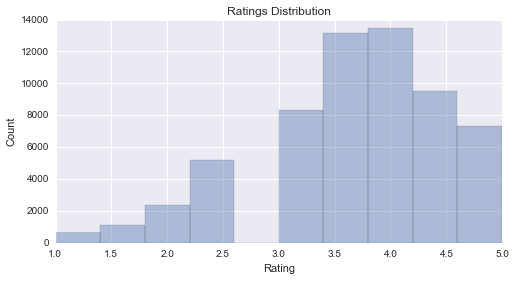

Mean: 3.673305
Min: 1.000000
Max: 5.000000


In [96]:
sns.set(rc={"figure.figsize": (8, 4)})

data = business_df['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print "Mean: %f" % data.mean()
print "Min: %f" % data.min()
print "Max: %f" % data.max()

####Ratings Distribution for Chinese Restaurants

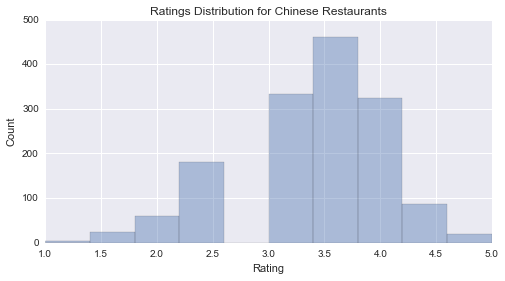

Mean: 3.353610
Min: 1.000000
Max: 5.000000


In [95]:
sns.set(rc={"figure.figsize": (8, 4)})

data = business_df[business_df['Chinese'] == 1]['stars']
sns.distplot(data, kde=False, bins=10)

# Add headers and labels to the plot
plt.title('Ratings Distribution for Chinese Restaurants')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Print some descriptive statistics
print "Mean: %f" % data.mean()
print "Min: %f" % data.min()
print "Max: %f" % data.max()

In [121]:
sns.set(rc={"figure.figsize": (20, 4)})

top_categories = sorted_categories[:20].index.values
# data = business_df[np.append(top_categories, ['stars'])]
sns.boxplot(x='categories', y='stars', data=business_df, orient='v')

plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

###Analysis

In [99]:
numeric_only = business_df.select_dtypes(exclude=['object'])

In [143]:
data = numeric_only[numeric_only['Restaurants'] == 1].drop(sorted_attributes[20:].index.values, axis=1)
labels = numeric_only[numeric_only['Restaurants'] == 1]['stars']

In [144]:
from sklearn.cross_validation import train_test_split

# split into test and train sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data.values, labels.values, test_size=0.3, random_state=42)

In [145]:
from statsmodels.discrete.discrete_model import MNLogit

model = sm.discrete.discrete_model.MNLogit(train_labels, train_data)
results = model.fit_regularized()
results.summary()

AttributeError: 'float' object has no attribute 'exp'

In [63]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators = 100, max_features='auto', max_depth=4)
clf = clf.fit(train_data,train_labels)
predictions = clf.predict(test_data)
score = forest.score(test_data, test_labels)
print "Score: %s" % (score)
    
# # print the confusion matrix
# print "Confusion Matrix:"
# cm = confusion_matrix(test_data[0::,0], predictions)
# print cm
# print "Normalized Confusion Matrix:"
# normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print normalized

# # look at feature importance
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # print the feature ranking
# print("Feature ranking:")
# sorted_features = []
# for f in range(len(indices)):
#     print("%d. feature %d %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))
#     sorted_features.append(features[indices[f]])

# # plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(len(indices)), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(len(indices)), sorted_features, rotation=70)
# plt.xlim([-1, len(indices)])
# plt.show()

ValueError: could not convert string to float: beer_and_wine